# **Machine Learning Project - Malware Detection :**
- ### **This project investigates the effectiveness of machine learning for malware detection, employing Logistic Regression, Support Vector Machine, and Decision Tree classifiers. Rigorous evaluation reveals exceptional performance across all models, achieving near-perfect accuracy and demonstrating their potential for real-world deployment as robust malware detection tools.**
---
# Importing necessary libraries :

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset :

In [31]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine Learning Projects/Datasets/Malware_Data.csv')
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


# Checking basic information about our dataframe 'data' :

In [32]:
data.shape

(100000, 35)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [34]:
data.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [35]:
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

# Checking missing values :

In [36]:
data.isnull().sum().sum()

0

# Separating features (X) and target (y) :

In [37]:
X = data.drop('classification', axis=1)  # Features
y = data['classification']  # Target variable

# Checking class balance report :

In [38]:
print(y.value_counts())

classification
malware    50000
benign     50000
Name: count, dtype: int64


# **1. Malware :**
- ### Malware is short for "malicious software." It refers to any software program designed to harm or gain unauthorized access to a computer system.
# **2. Benign :**
- ### Benign means harmless or not malicious. In the context of software, it refers to programs that are not intended to cause harm or compromise security.
- ### **Our dataset has a balanced class distribution with 50,000 samples each for malware and benign classifications. This is good news because it means we likely won't need to apply specific techniques to handle class imbalance, such as oversampling or undersampling.**
---
# Splitting the data into training and testing sets :

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Below code first trains a **LabelEncoder** on the training data's **'hash'** column and then applies that trained encoder to both the training and testing data, ensuring consistent numerical representation for 'hash' across the datasets.

In [40]:
# 1. Initializing LabelEncoder
le = LabelEncoder()

# 2. Fitting and transforming the 'hash' column in both train and test sets
X_train['hash'] = le.fit_transform(X_train['hash'])
X_test['hash'] = le.transform(X_test['hash'])

# Scaling the features using **StandardScaler** :
- ### Below code scales the training data (X_train) using StandardScaler and then applies the same scaling to the testing data (X_test) for consistent feature transformation.

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the models :
- ### Since we are building a malware detection system, it's likely that **"malware"** should be the **positive label.**

In [42]:
# Defines a dictionary to store the models
models = {
    'Logistic Regression': LogisticRegression(),  # Creates a Logistic Regression model
    'Support Vector Machine': SVC(),  # Creates a Support Vector Machine model
    'Decision Tree': DecisionTreeClassifier()  # Creates a Decision Tree model
}

# Initializes an empty list to store the results
results = []
# Iterates over the models in the dictionary
for model_name, model in models.items():
    # Trains the current model on the training data
    model.fit(X_train, y_train)
    # Makes predictions on the testing data
    y_pred = model.predict(X_test)
    # Calculates the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    # Calculates the precision of the model, assuming 'malware' is the positive class
    precision = precision_score(y_test, y_pred, pos_label='malware')
    # Calculates the recall of the model, assuming 'malware' is the positive class
    recall = recall_score(y_test, y_pred, pos_label='malware')
    # Calculates the F1-score of the model, assuming 'malware' is the positive class
    f1 = f1_score(y_test, y_pred, pos_label='malware')
    # Appends the results for the current model to the list
    results.append([model_name, accuracy, precision, recall, f1])

# Creating a dataframe to compare the results :

In [43]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.00000,1.0,1.0000,1.00000
1,Support Vector Machine,0.99995,1.0,0.9999,0.99995
2,Decision Tree,1.00000,1.0,1.0000,1.00000


### As we can see all three models exhibit exceptionally high performance, with Logistic Regression and Decision Tree achieving perfect scores, while Support Vector Machine performs near-perfectly.
---
# Visualizing the results :

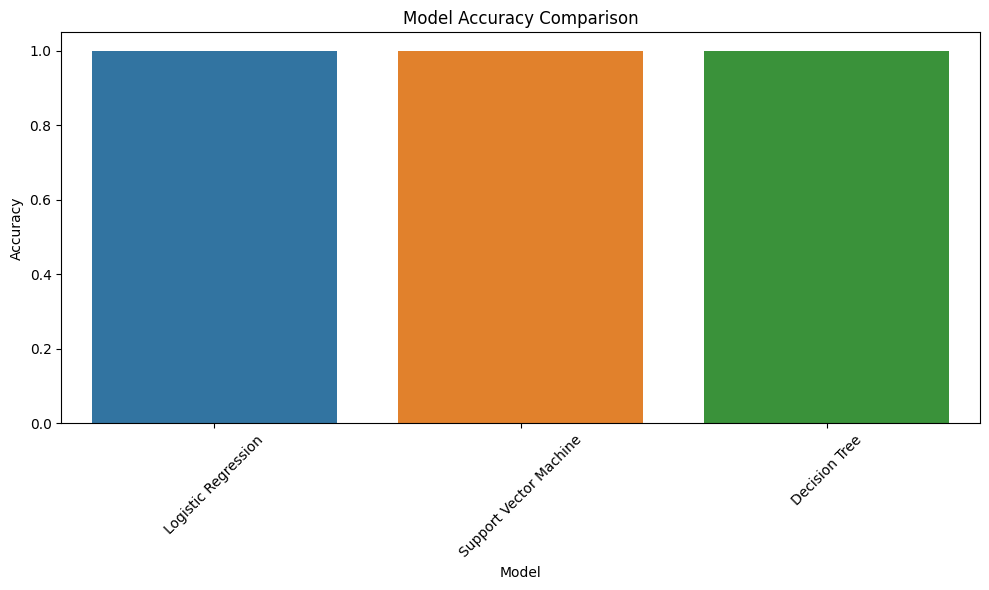

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, hue = 'Model')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Making a prediction on a new input value :

In [52]:
new_input_value = X_test[10].reshape(1,-1)
new_input_value = scaler.transform(new_input_value)  # Scales the input
prediction = models['Logistic Regression'].predict(new_input_value)  # Chooses our desired model
print('Prediction:', prediction)

Prediction: ['benign']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Below code accesses and retrieves the value of the target variable (**y**) for the 11th sample (index 10) in the test set (**y_test**).

In [51]:
y_test.iloc[10]

'benign'